In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stable_baselines3 import DQN

In [4]:
model = DQN.load('../best_model/dqn/CnnPolicy/best_model.zip')
dqn_net = model.q_net
# model = DQN.load('../output_models/dqn/CnnPolicy/2022-05-30_22_25_06_94.zip')


X = np.load('../best_model/dqn/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([633, 1, 1, 10, 7])

In [5]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

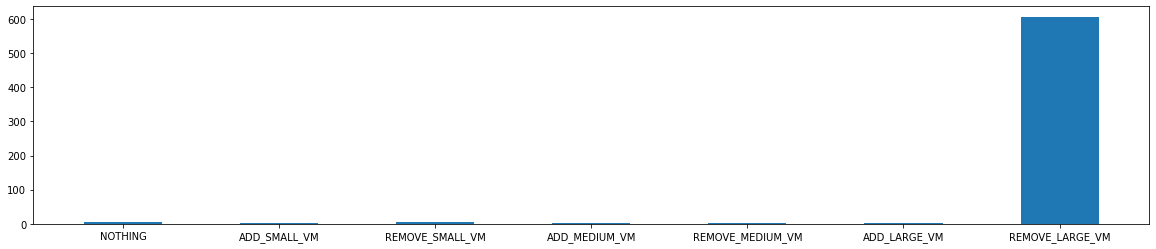

In [6]:
plot_action_histogram(predictions)

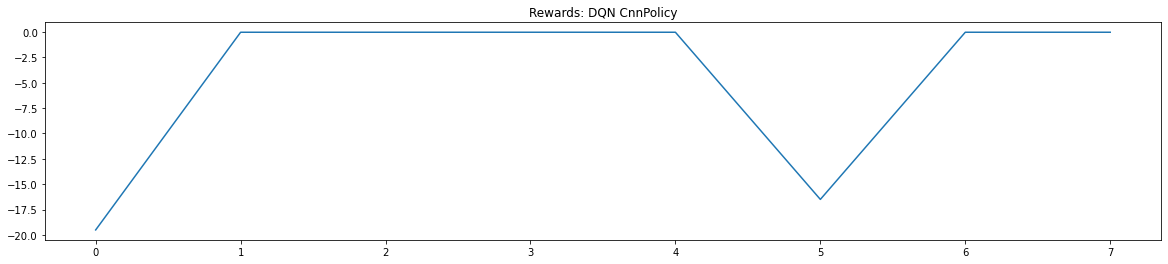

In [7]:
plot_training_data('../best_model/dqn/CnnPolicy/best_model_rewards.csv', data_type='reward', title='DQN CnnPolicy')

In [8]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
X_sample = X[N+40:2*(N+40)]
predictions_sample = predictions[N+40:2*(N+40)]
ig_attributor = IGAttributor(net=dqn_net,
                             agent='dqn',
                             policy='cnn',
                             data=X_sample,
                            predictions=predictions_sample)
mean_attributions = ig_attributor.get_mean_attributions()


torch.Size([93, 1, 10, 7])


In [9]:
dqn_net.forward(X[0])

tensor([[ 0.0351,  0.0171,  0.0006, -0.0626, -0.0026, -0.1388,  0.1010]],
       grad_fn=<AddmmBackward0>)

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/captum/attr/_utils/visualization.py:45: UserWarning: Attempting to normalize by value approximately 0, visualized resultsmay be misleading. This likely means that attribution values are allclose to 0.
  "Attempting to normalize by value approximately 0, visualized results"


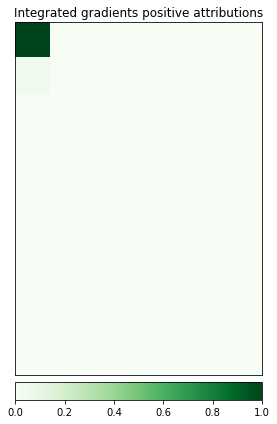

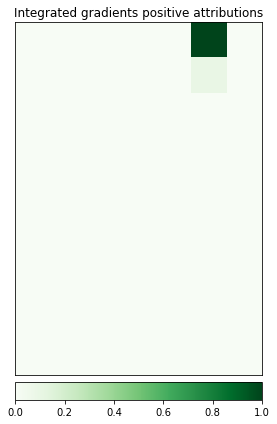

AssertionError: Cannot normalize by scale factor = 0

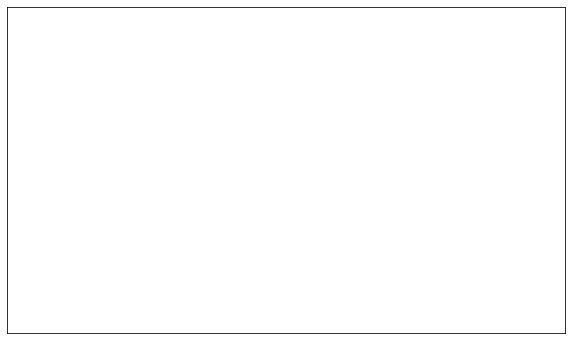

In [10]:
plot_mean_attributions(mean_attributions=mean_attributions, policy='cnn')

torch.Size([93, 1, 1, 10, 7])
torch.Size([1, 1, 10, 7])
Action made: REMOVE_LARGE_VM
Q-values:
NOTHING: 0.03475460037589073
ADD_SMALL_VM: 0.01920672506093979
REMOVE_SMALL_VM: -0.005278856493532658
ADD_MEDIUM_VM: -0.06491370499134064
REMOVE_MEDIUM_VM: 0.001138053834438324
ADD_LARGE_VM: -0.13738900423049927
REMOVE_LARGE_VM: 0.09827316552400589


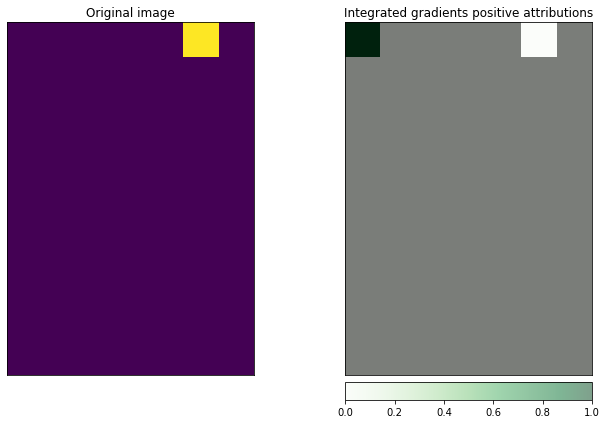

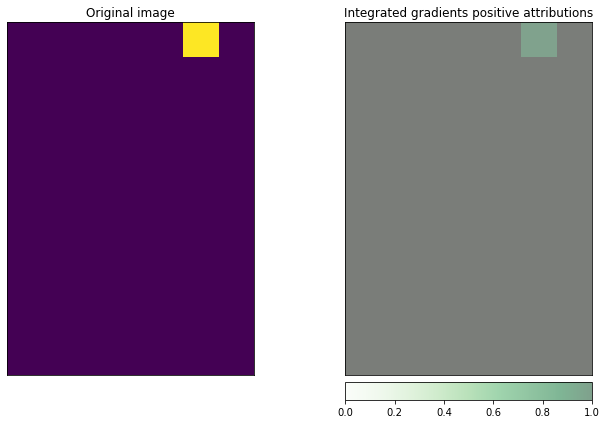

AssertionError: Cannot normalize by scale factor = 0

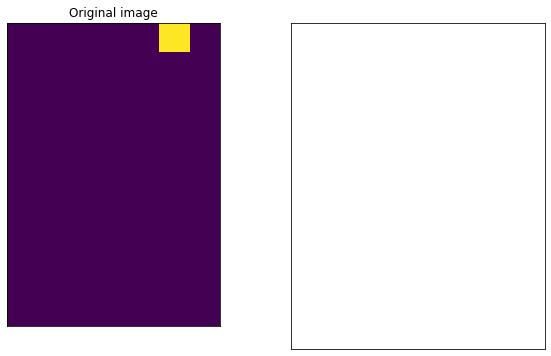

In [13]:
ig_attributor.explain_example(idx=49)

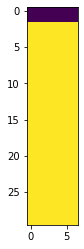

In [133]:
import matplotlib.pyplot as plt
img = X[0]
# img = np.transpose(img.cpu().detach().numpy()[0], (1, 2))
img = img.squeeze()
img.shape
img = img + 0.7
img[0:2, :] *= 0.1
imgplot = plt.imshow(img)

In [32]:
X_manual = torch.Tensor([[[
    [[0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]],
    # [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    # [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ]]])

In [33]:
X_manual.shape

torch.Size([1, 1, 1, 10, 7])

In [34]:
ig_attributor = IGAttributor(net=dqn_net,
                            policy='cnn',
                            agent='dqn',
                            data=X_manual)

torch.Size([1, 1, 10, 7])


torch.Size([1, 1, 1, 10, 7])
torch.Size([1, 1, 10, 7])
Action made: ACTION_NOTHING
Q-values:
ACTION_NOTHING: 0.06463735550642014
ACTION_ADD_SMALL_VM: -0.08389327675104141
ACTION_REMOVE_SMALL_VM: 0.04306372255086899
ACTION_ADD_MEDIUM_VM: -0.05285155400633812
ACTION_REMOVE_MEDIUM_VM: 0.03967861458659172
ACTION_ADD_LARGE_VM: -0.0068174563348293304
ACTION_REMOVE_LARGE_VM: 0.023430166766047478


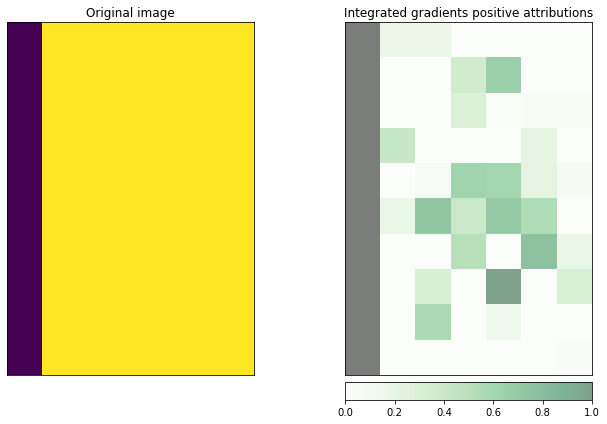

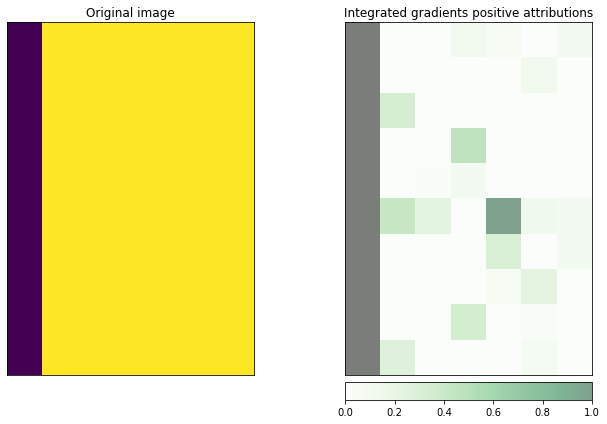

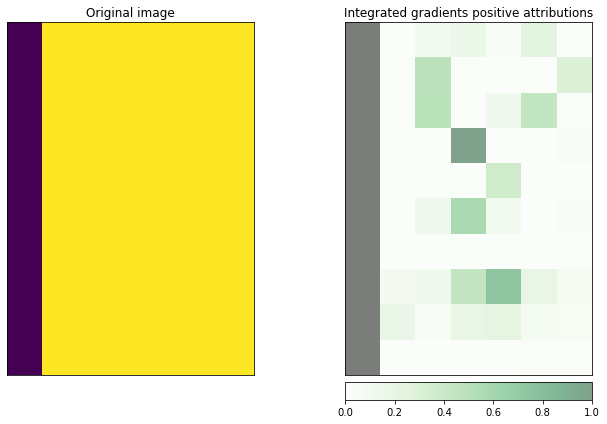

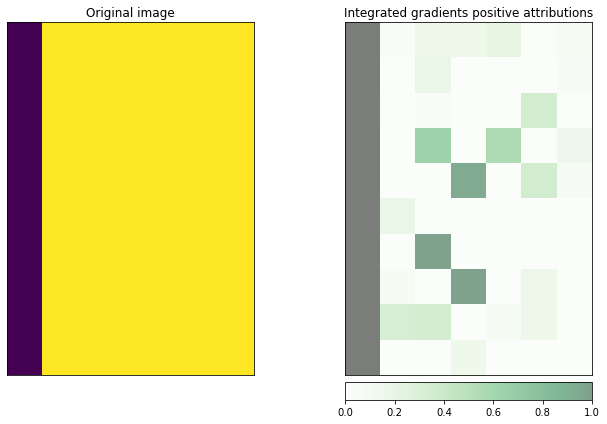

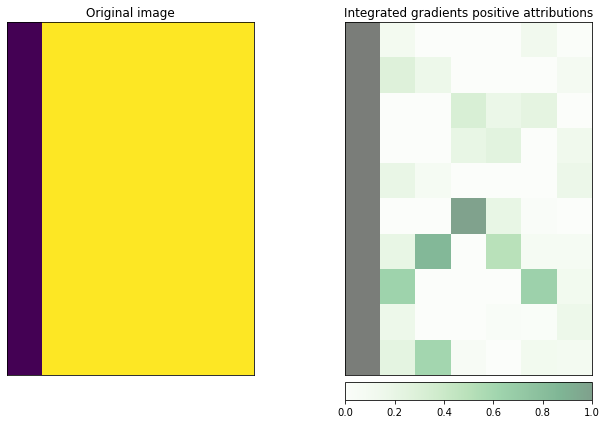

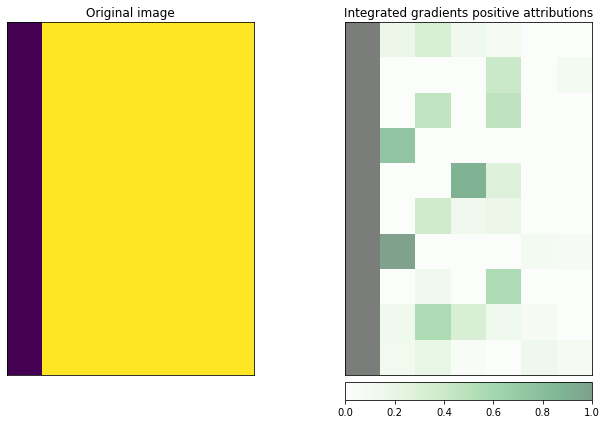

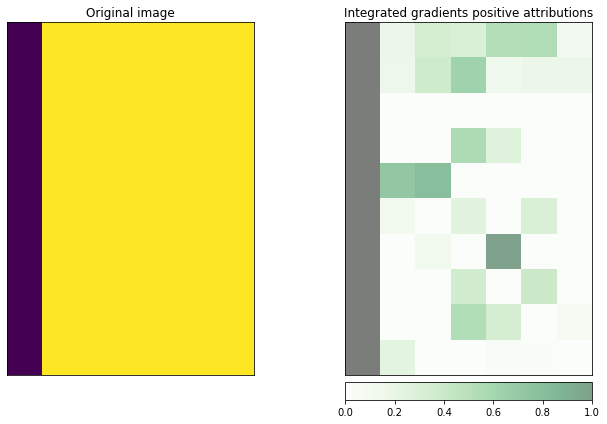

In [35]:
ig_attributor.explain_example(idx=0)